In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [4]:
train_df = pd.read_csv("/Users/user/Downloads/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/Users/user/Downloads/house-prices-advanced-regression-techniques/test.csv")


In [5]:
features = train_df.drop(columns=["SalePrice"]).columns.tolist()
target = "SalePrice"


In [ ]:
#handle categorical variables with one_hot encoding 
X_train_encode = pd.get_dummies(train_df[features])
X_test_encode = pd.get_dummies(test_df[features])


list

In [7]:
#align the columns together
X_train_encode, X_test_encode = X_train_encode.align(X_test_encode, join='left', axis=1, fill_value=0)

In [8]:
#handle missing values 
imputer = SimpleImputer(strategy="mean")
X_train_trans = imputer.fit_transform(X_train_encode)
X_test_trans = imputer.transform(X_test_encode)

In [ ]:
#extract the feauture and target variable 
X_train = X_train_trans
y_train = train_df["SalePrice"].values
X_test = X_test_trans


numpy.ndarray

In [114]:
#Select model and fit the model 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predict on the test set 
y_pred = model.predict(X_train)
print(y_pred.shape)

(1460,)


1460 1460


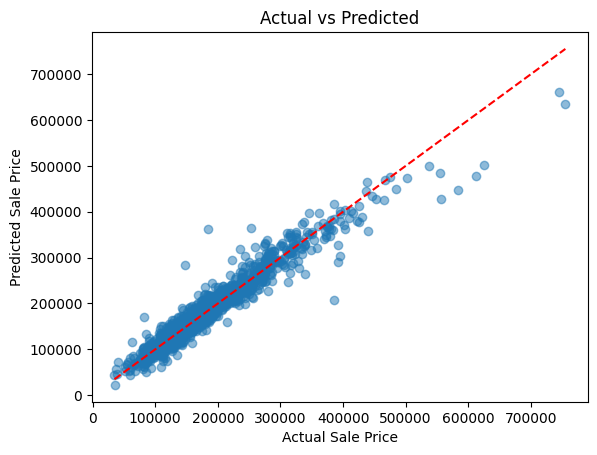

In [121]:
print(len(y_train), len(y_pred)) 
plt.scatter(y_train, y_pred, alpha=0.5)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.show()